In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from qiskit import Aer, QuantumCircuit, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit import Parameter 

逆量子フーリエ変換関数を用意

In [33]:
def qft_rotate_single_inv(circuit, i, n):
    if n == 0:
        return circuit
    for qubit in range(0, i):
        circuit.cp(-math.pi/2**(i - qubit), qubit, i)
    circuit.h(i)

def qft_dagger(circuit, n):
    for i in range(math.floor(n/2)):
        circuit.swap(i, n - (i + 1))
    for i in range(n):
        qft_rotate_single_inv(circuit, i, n)

位相推定の条件設定

In [164]:
n_encode =6 #求めたい固有値の位相角をエンコードする量子ビット数
n_eigenstate = 1 #固有状態の量子ビット数
n = n_encode + n_eigenstate
phase = np.random.rand()
theta = Parameter('θ\'')

位相推定回路の作成

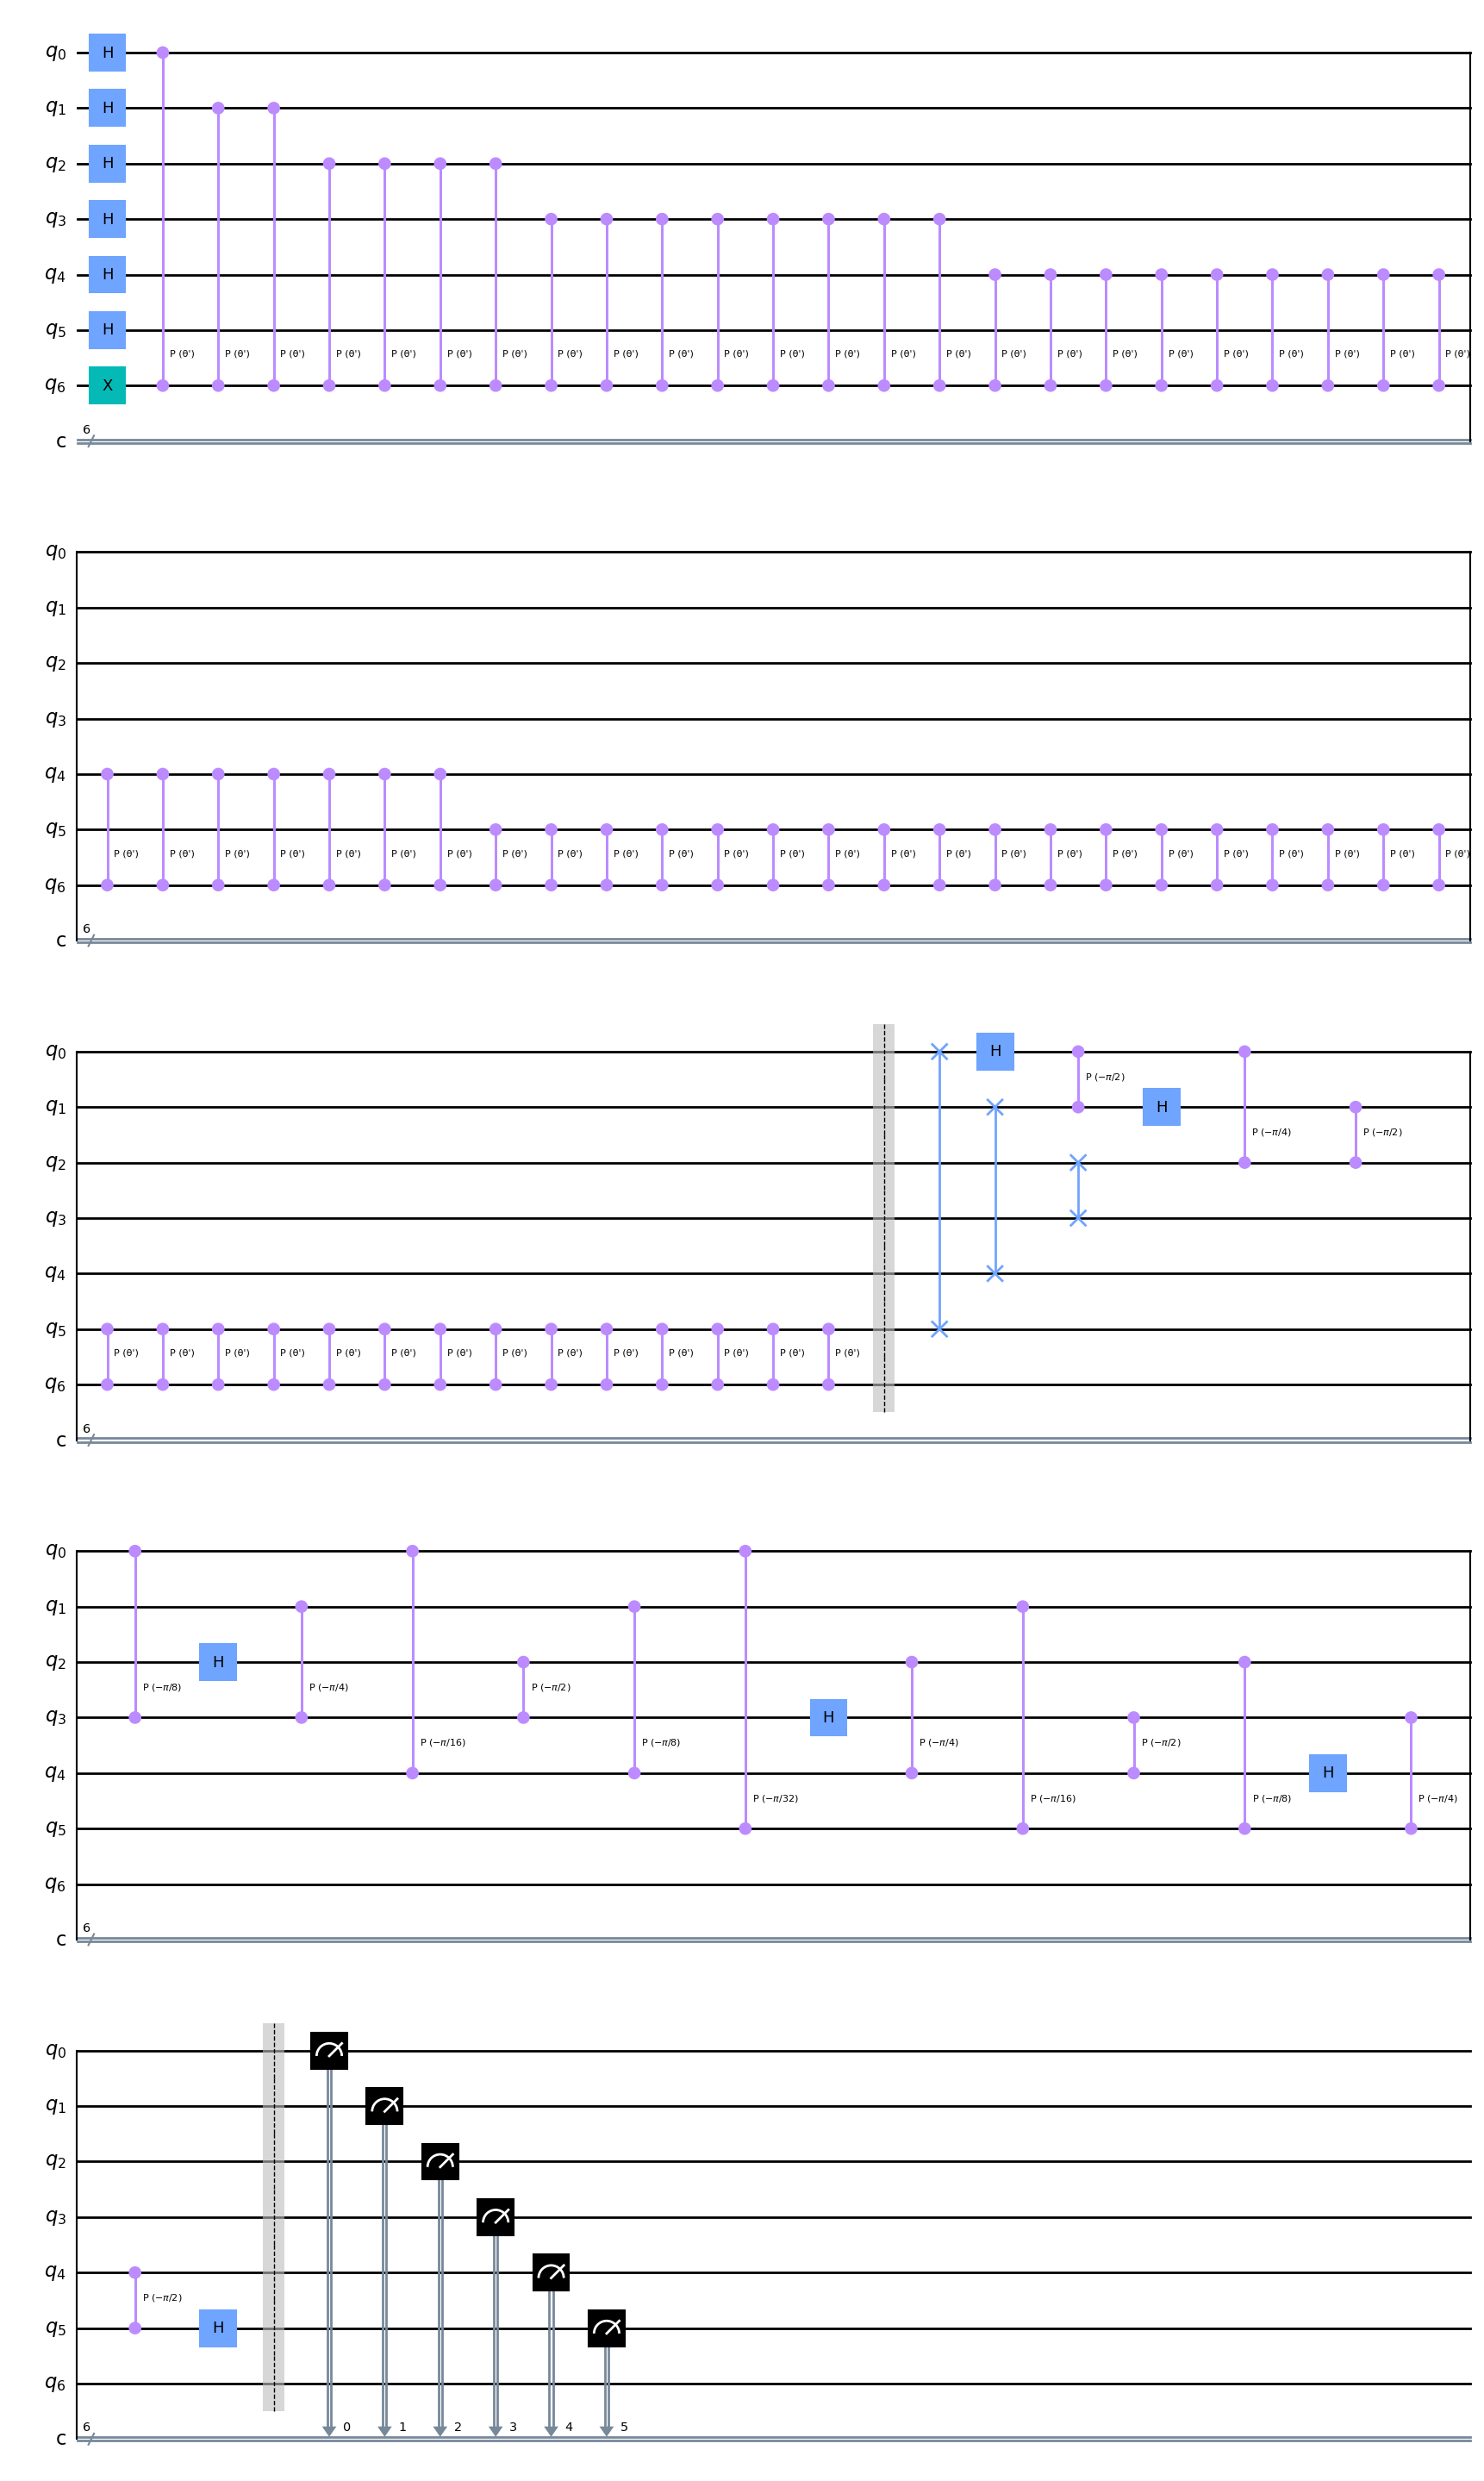

In [165]:
qc = QuantumCircuit(n, n_encode)
qc.x(n_encode) #固有状態を用意

for qubit in range(n_encode):
    qc.h(qubit)

repetitions = 1
for count in range(n_encode):
    for i in range(repetitions):
        qc.cp(theta, count, n_encode)
    repetitions *= 2

qc.barrier()
qft_dagger(qc, n_encode)

qc.barrier()
for n in range(n_encode):
    qc.measure(n,n)

qc.draw(output = 'mpl')

実行

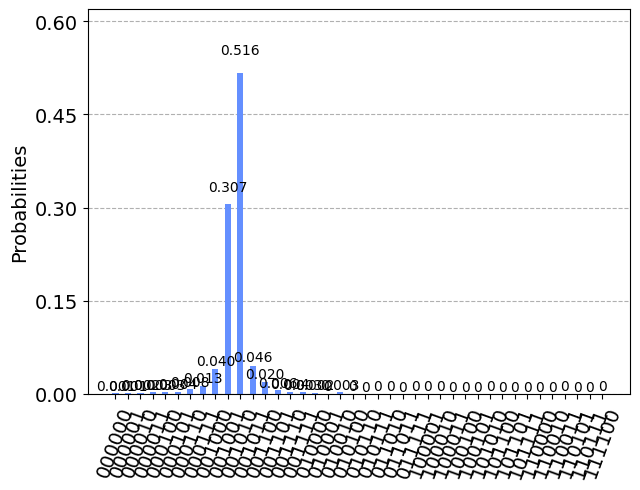

In [166]:
qc_parametrized = [qc.bind_parameters({theta: phase}) for i in range(2**n_encode -1)][-1]
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qc_parametrized, backend=backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [167]:
ans_keys = list(answer.keys())
ans_idx = np.argmax(list(answer.values()))
ans = int(ans_keys[ans_idx], 2)
print(ans)

10


In [168]:
ans_idx = np.argmax(list(results.get_counts().values()))
phase_estimated = ans / (2 ** n_encode)
print('True phase: {:.4f}'.format(phase / (2 * np.pi)))
print('EStimated phase: {:.4f}'.format(phase_estimated))

True phase: 0.1493
EStimated phase: 0.1562
